
# <font color='Orange'> Machine Learning- Phase 2:
# <font color='Orange'>Modeling and Prediction of Bank Customer Churn data.
    
> <font color='Black'>**Sudeshna Nayek- s3821041**

---
    
#  Introduction

## <font color='Gray'> Report Overview

<font color='Black'> In this report we will fit three classifiers in order to predict whether a customer withdraw their account from the  bank or not. The models will then be compared in order to gain maximum accuracy. The data we are using has already been preprocessed and the final dataset contains 9987 records of bank customers based out of France, Germany and Spain. The descriptive features include 3 numeric and 8 categorical features. The target feature is Exited, 1 representing customers who have already left the bank and 0 for the existing ones. The report will contain the following:

- Overview of methodology.
- Predictive Modeling.
    - Feature selection
    - Model Fitting and Tuning
    - Model Comparison
- Critique & Limitations
- Summary & Conclusions
    - Project Summary
    - Summary of Findings
    - Conclusion


## <font color='Gray'> Overview of Methodology


<font color='Black'> In order to predict the target feature, we will be using the following classifiers:

- Decision Tree
- Random Forest
- Gradient Boosting

Given the data is already preprocessed, we will start off with creating 2 datasets, one will contain all the predictors and the other will contain the target feature.
Both of these datasets will then be divided into train and test data in a ratio of 70:30 respectively.
Therefore 6990 records will be used for hyper-parameter tuning and 2996 records to be used for model comparison.

Feature scaling is not required as Decision Tree, Random Forest and Gradient Boosting classifiers doesn't use distance. These algorithms does not require normalisation of the descriptive features as they require partitioning.
However, we will select the best features amongst the 10 predictors we have and proceed with them if the results allows so.
Using feature selection together with hyperparameter search (GridSearchCV) inside a single pipeline, we will conduct a 10-fold stratified cross-validation to fine-tune hyperparameters of each classifier using accuracy as the performance metric. Multiple combinations of parametric values will be used during tuning in order to come across the best set of hyperparameter values. The best set will then be identified by the GridSearchCV tuning method. 

After identifying the three tuned classifiers, we will "fit" them on the test data using 10-fold cross-validation in a paired fashion and we will perform paired t-tests to see if there is any any statistically significant difference in them. In addition, we compare the classifiers with respect to their recall scores and confusion matrices on the test data.

# Predictive Modeling :


<font color='Black'> In order to build a model we will read the preprocessed data into Python.

#### <font color='Gray'> Preleminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import feature_selection as fs
from sklearn import metrics
from scipy import stats

import warnings
warnings.filterwarnings("ignore")


In [2]:
churn_data = pd.read_csv('/Users/sudeshna/Desktop/Untitled Folder/Customer_ChurnData.csv')

In [3]:
churn_data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Gender_cat,Germany,Spain
0,619,42,2,0.00,1,1,1,1,0,0.0,0.0
1,608,41,1,83807.86,1,0,1,0,0,0.0,1.0
2,502,42,8,159660.80,3,1,0,1,0,0.0,0.0
3,699,39,1,0.00,2,0,0,0,0,0.0,0.0
4,850,43,2,125510.82,1,1,1,0,0,0.0,1.0
5,645,44,8,113755.78,2,1,0,1,1,0.0,1.0
6,822,50,7,0.00,2,1,1,0,1,0.0,0.0
7,501,44,4,142051.07,2,0,1,0,1,0.0,0.0
8,684,27,2,134603.88,1,1,1,0,1,0.0,0.0
9,528,31,6,102016.72,2,0,0,0,1,0.0,1.0


In [4]:
churn_data = churn_data.astype(np.int)

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CreditScore     9986 non-null   int64
 1   Age             9986 non-null   int64
 2   Tenure          9986 non-null   int64
 3   Balance         9986 non-null   int64
 4   NumOfProducts   9986 non-null   int64
 5   HasCrCard       9986 non-null   int64
 6   IsActiveMember  9986 non-null   int64
 7   Exited          9986 non-null   int64
 8   Gender_cat      9986 non-null   int64
 9   Germany         9986 non-null   int64
 10  Spain           9986 non-null   int64
dtypes: int64(11)
memory usage: 858.3 KB


In [5]:
Data=churn_data.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
Target=churn_data.iloc[:,7] 

Target.value_counts()

0    7963
1    2023
Name: Exited, dtype: int64

We can see that the classes are in a 80:20 ratio therefore, we would need to stratify the dataset later.
    
We will now split the data into train and test datasets into 70:30 ratio.



In [6]:
Data_train, Data_test, Target_train, Target_test = train_test_split(Data, Target, test_size=0.3,random_state=4)

In [7]:
print(Data_train.shape)
print(Data_test.shape)
print(Target_train.shape)
print(Target_test.shape)


(6990, 10)
(2996, 10)
(6990,)
(2996,)


Converting the datasets into numpy array for further analysis.

In [8]:
Data_train= Data_train.to_numpy()


In [9]:
type(Data_train)

numpy.ndarray

In [10]:
Data_test= Data_test.to_numpy()

In [11]:
type(Data_test)

numpy.ndarray

## <font color='Gray'>Model selection


<font color='Black'> In this section we will fit Decision Tree, Random Forest and Gradient Boosting models and see their accuracy scores respectively.

### <font color='Orange'> Decision Tree

In [12]:

dt_classifier = DecisionTreeClassifier(max_depth=4,
                                       criterion='entropy',
                                       random_state = 4)

Fitting the Descision tree in the training dataset.

In [13]:
dt_classifier.fit(Data_train, Target_train);

In [14]:
dt_classifier.score(Data_test, Target_test)

0.8447930574098799

### <font color='Orange'> Random Forest

In [53]:
rf_classifier=RandomForestClassifier(n_estimators=100, random_state= 4)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_classifier.fit(Data_train,Target_train)



RandomForestClassifier(random_state=4)

In [54]:
rf_classifier.score(Data_test, Target_test)

0.8491321762349799

### <font color='Orange'>Gradient Boosting

In [17]:
gbm_classifier = GradientBoostingClassifier(random_state=4)

gbm_classifier.fit(Data_train, Target_train)

GradientBoostingClassifier(random_state=4)

In [18]:
gbm_classifier.score(Data_test, Target_test)

0.8508010680907877



## <font color='Gray'> Feature selection

<font color='Black'> In this section we will try selecting the most important features in the dataset by Random Forest classifier which will help in our prediction. 

### Feature selection with Random Forest Importance.

In [19]:
# Create a RFI with default gini criterion.
clf = RandomForestClassifier(n_estimators=1000, random_state=4, n_jobs=-1)

# Train the classifier
clf.fit(Data_train, Target_train)

# Feature and it's respective gini importance
for feature in zip(Data, clf.feature_importances_):
    print(feature)

('CreditScore', 0.19411958115433126)
('Age', 0.27079728061725805)
('Tenure', 0.10412475968462241)
('Balance', 0.17505913046774488)
('NumOfProducts', 0.13109603505856435)
('HasCrCard', 0.021730249975970735)
('IsActiveMember', 0.04234319208134191)
('Gender_cat', 0.020662054496997078)
('Germany', 0.0196818110739646)
('Spain', 0.02038590538920474)


Next, we will create a selector object that will use the rfi to identify those features which have importance of more than 0.10 in the model and print the names of the features.

In [20]:
sel = SelectFromModel(clf, threshold=0.10)

# Train the selector
sel.fit(Data_train, Target_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=4),
                threshold=0.1)

In [21]:
feature_index= sel.get_support(indices=True)

In [22]:
colname = Data.columns[feature_index]
print (colname)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts'], dtype='object')


As we can see, CreditScore, Age, Tenure, Balance and NumOfProducts can explain majority of the data. Thus, we will create train and test datasets containing only these features. 

In [23]:
Data_train_important = sel.transform(Data_train)
Data_test_important = sel.transform(Data_test)

Next, we will create a new rfi classifier with the most important identified features and train the new dataset with it.

In [24]:
clf_important = RandomForestClassifier(n_estimators=1000, random_state=4, n_jobs=-1)

clf_important.fit(Data_train_important, Target_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=4)

We will compare the full featured classifier and the important feature classifiers in order to see the difference in the accuracy scores.

In [25]:
# Full Featured Classifier on test data
Target_pred = clf.predict(Data_test)

# View accuracy score of Full Feature (10) model:
accuracy_score(Target_test, Target_pred)

0.8508010680907877

In [26]:
# Important Featured Classifier on test data
Target_important_pred = clf_important.predict(Data_test_important)

# View accuracy score of Important Feature (5) model:
accuracy_score(Target_test, Target_important_pred)

0.8294392523364486

On comparing the accuracy scores we can see that the original model with all the features has an accuracy of 85.08% whereas, the model with 5 important feature gives as good as 83% accuracy. Therefore, we have almost halved the number of features for a very small cost in accuracy.


## <font color='Gray'> Model Fitting and Tuning

In this section we will use Stratified K Fold cross validation object and pass it through GridSearchCV function in order to tune the hyperparameters and then build 3 different models with the data.

In [27]:
cv_method = StratifiedKFold(n_splits=10, 
                                    random_state=4)

In [28]:
# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    def __init__(self, n_features_= 5):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from numpy import argsort
        clf_important = RandomForestClassifier(n_estimators=100)
        clf_important.fit(X, y)
        self.fs_indices_ = argsort(clf_important.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

In [29]:
pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier( random_state=4))])

params_pipe_DT = {'rfi_fs__n_features_': [5, 6, 7, Data.shape[1]],
                  'dt__criterion': ['gini', 'entropy'],
                  'dt__max_depth': [3, 4, 5, 6,7,8],
                  'dt__min_samples_split': [2,3,5]}

gs_pipe_DT = GridSearchCV(estimator= pipe_DT, 
                          param_grid= params_pipe_DT, 
                          cv= cv_method,
                          n_jobs= -2,
                          scoring='accuracy',
                          verbose=2) 

gs_pipe_DT.fit(Data_train, Target_train);

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 359 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-2)]: Done 642 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-2)]: Done 1007 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-2)]: Done 1440 out of 1440 | elapsed: 14.5min finished


In [30]:
gs_pipe_DT.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': 5,
 'dt__min_samples_split': 3,
 'rfi_fs__n_features_': 7}

In [31]:
gs_pipe_DT.best_score_

0.8542203147353362

In [32]:
results_DT = pd.DataFrame(gs_pipe_DT.cv_results_['params'])
results_DT['test_score'] = gs_pipe_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['dt__criterion', 'dt__max_depth', 'dt__min_samples_split',
       'rfi_fs__n_features_', 'test_score'],
      dtype='object')

####  Plot showing the performance comparison between Gini and Entropy impurity

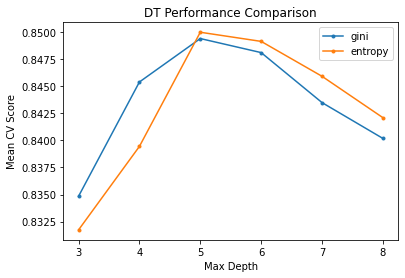

In [33]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['dt__criterion'] == i]
    temp_average = temp.groupby('dt__max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

### Random Forest

In [34]:
pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('rf', RandomForestClassifier(random_state=4))])


params_pipe_RF = {'rfi_fs__n_features_': [3, 5],  
                  'rf__criterion': ['entropy', 'gini'],
                  'rf__max_depth': [2, 3, 5], 
                  'rf__min_samples_split': [2, 3, 5],
                  'rf__min_samples_leaf': [1,5,8]
             
                 }

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='accuracy',
                          verbose=2) 

gs_pipe_RF.fit(Data_train, Target_train);

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-2)]: Done 359 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-2)]: Done 642 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-2)]: Done 1007 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-2)]: Done 1080 out of 1080 | elapsed: 13.2min finished


In [35]:
gs_pipe_RF.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 5,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 5,
 'rfi_fs__n_features_': 5}

In [36]:
gs_pipe_RF.best_score_

0.8319027181688126

In [37]:
results_RF = pd.DataFrame(gs_pipe_RF.cv_results_['params'])
results_RF['test_score'] = gs_pipe_RF.cv_results_['mean_test_score']
results_RF.columns

Index(['rf__criterion', 'rf__max_depth', 'rf__min_samples_leaf',
       'rf__min_samples_split', 'rfi_fs__n_features_', 'test_score'],
      dtype='object')

####  Plot showing the performance comparison between Gini and Entropy impurity

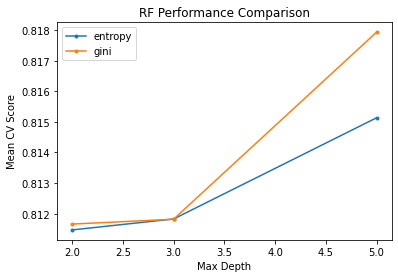

In [38]:
for i in ['entropy', 'gini']:
    temp = results_RF[results_RF['rf__criterion'] == i]
    temp_average = temp.groupby('rf__max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("RF Performance Comparison")
plt.show()

### Gradient Boosting

In [39]:
pipe_GB = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('gb', GradientBoostingClassifier(random_state=4))])


params_pipe_GB = {'rfi_fs__n_features_': [3, 5, Data.shape[1]], 
                  'gb__criterion': ['friedman_mse', 'mse'],
                  'gb__max_depth': [3, 5], 
                  'gb__min_samples_split': [2, 3, 5],
                  'gb__n_estimators': [20, 40, 60, 80, 100]
                 }

          
gs_pipe_GB = GridSearchCV(estimator=pipe_GB, 
                          param_grid=params_pipe_GB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='accuracy',
                          verbose=2) 

gs_pipe_GB.fit(Data_train, Target_train);

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 359 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-2)]: Done 642 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-2)]: Done 1007 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-2)]: Done 1452 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-2)]: Done 1800 out of 1800 | elapsed: 23.7min finished


In [40]:
gs_pipe_GB.best_params_

{'gb__criterion': 'friedman_mse',
 'gb__max_depth': 3,
 'gb__min_samples_split': 2,
 'gb__n_estimators': 100,
 'rfi_fs__n_features_': 10}

In [41]:
gs_pipe_GB.best_score_

0.8612303290414879

In [42]:
results_GB = pd.DataFrame(gs_pipe_GB.cv_results_['params'])
results_GB['test_score'] = gs_pipe_GB.cv_results_['mean_test_score']
results_GB.columns

Index(['gb__criterion', 'gb__max_depth', 'gb__min_samples_split',
       'gb__n_estimators', 'rfi_fs__n_features_', 'test_score'],
      dtype='object')

####  Heatmap showing the performance comparison between Friedman_mse and mse 

<AxesSubplot:xlabel='param_gb__criterion', ylabel='param_gb__n_estimators'>

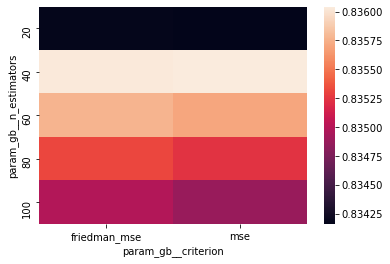

In [43]:
table = pd.pivot_table(pd.DataFrame(gs_pipe_GB.cv_results_),
    values='mean_test_score', index='param_gb__n_estimators', 
                       columns='param_gb__criterion')
     
sns.heatmap(table)

### <font color= 'Gray'> Model Comparison 
    
<font color= 'Black'> In hyperparameter tuning phase above, we used the 6990 rows in our training data within a cross-validation framework and we determined the best hyperparameter values for each of the three classifiers. 
For example, Random Forest's best hyperparameter values are criterion = gini, max_depth= 5,min_samples_leaf= 5, min_samples_split= 2, n_estimators= 20 and n_features_= 5.

We will now fit each tuned classifier (with the best set of hyperparameter values) on the remaining 2996 rows in the test data (also unseen data) in a cross-validated fashion in order to identify the best classifier. We will perform pairwise t-tests to determine if the difference between any of the classifier's performance is statistically significant. We will use the same cv_method of 10-fold stratified cross-validation in each of the three cross-validation runs. Then we conduct a paired t-test for the accuracy score between the following classifier combinations:
- DT vs. RF,
- DT vs. GB, and
- RF vs. GB.

In [44]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                 X=Data_test,
                                 y=Target_test, 
                                 cv=cv_method, 
                                 n_jobs=-2,
                                 scoring='accuracy')
cv_results_DT.mean()

0.8477792642140468

In [45]:

cv_method_test = StratifiedKFold(n_splits=10, random_state=4)

cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                 X=Data_test,
                                 y=Target_test, 
                                 cv=cv_method, 
                                 n_jobs=-2,
                                 scoring='accuracy')
cv_results_RF.mean()

0.8351070234113713

In [46]:
cv_results_GB = cross_val_score(estimator=gs_pipe_GB.best_estimator_,
                                X=Data_test,
                                y=Target_test, 
                                cv=cv_method, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_GB.mean()

0.8487748049052396

We can see that Gradient Boosting has the best cross validation score.
We will now perform a t-test in order to understand the whether the difference in accuracy results are significant.

In [47]:
print(stats.ttest_rel(cv_results_DT, cv_results_RF))
print(stats.ttest_rel(cv_results_DT, cv_results_GB))
print(stats.ttest_rel(cv_results_RF, cv_results_GB))

Ttest_relResult(statistic=2.107926570858072, pvalue=0.06428582698479261)
Ttest_relResult(statistic=-0.436150105131282, pvalue=0.6730027007980454)
Ttest_relResult(statistic=-2.108675488373305, pvalue=0.06420770844770489)


As we can see from the p-values of all the three classifiers, accuracy scores of random forest and gradient boosting are significantly different.

In [48]:
pred_DT = gs_pipe_DT.predict(Data_test)

In [49]:
pred_RF = gs_pipe_RF.predict(Data_test)

In [50]:
pred_GB = gs_pipe_GB.predict(Data_test)

In [51]:
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(Target_test, pred_DT))
print("\nClassification report for Random Forest") 
print(metrics.classification_report(Target_test, pred_RF))
print("\nClassification report for Gradient Boosting") 
print(metrics.classification_report(Target_test, pred_GB))


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2371
           1       0.82      0.37      0.51       625

    accuracy                           0.85      2996
   macro avg       0.84      0.67      0.71      2996
weighted avg       0.85      0.85      0.83      2996


Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2371
           1       0.85      0.21      0.34       625

    accuracy                           0.83      2996
   macro avg       0.84      0.60      0.62      2996
weighted avg       0.83      0.83      0.78      2996


Classification report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2371
           1       0.75      0.43      0.54       625

    accuracy                           0.85      2996
 

In [52]:
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(Target_test, pred_DT))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(Target_test, pred_RF))
print("\nConfusion matrix for Gradient Boosting") 
print(metrics.confusion_matrix(Target_test, pred_GB))


Confusion matrix for Decision Tree
[[2320   51]
 [ 396  229]]

Confusion matrix for Random Forest
[[2347   24]
 [ 494  131]]

Confusion matrix for Gradient Boosting
[[2282   89]
 [ 359  266]]


We want to correctly predict the customers who are going to withdraw their accounts in future and hence we will maximize false negatives, i.e. will maximize the recall value which is (TP/TP+FN). From the classification report, we can see that Gradient Boosting has the highest recall rate (43%). Thus, we can conclude that Gradient Boosting algorithm is the best model for this dataset in terms of accuracy and recall factors.  

## Limitations and Critique

 We indeed have identified and built the most suitable model however, there are few limitations to it. 
- Firstly, we have used classifiers such as Random Forest and Gradient Boosting, which although gives high accuracy but compromises on interpretability. That is, there is not much clarity as to why certain decisions are made, how should we interpret the models and make sure the results of the said algorithm are fair and statistically valid. We have visualisations of the performance for each classifiers based on their criterion but in order to show the backend process, more visualisations can be introduced. 
- Secondly, hyperparameterisation has been done keeping computational time in mind. Classifiers are kept limited to 100 estimators same is true for max_depths and max_splits. Improvement can be made if tuned further.
- Thirdly, this study is limited to the three models we have used. There are many others (for e.g. XGBoost, ANN) which can be used to predict the churn customers.
    
##  <font color='Black'> Summary & Conclusion

### <font color='Gray'> Project Summary

<font color='Black'> In Phase 1 of this project we have seen that the current 20.26% churn rate consists mostly Male customers but there was high probability of female customers having balance more than 220,000 Euro leaving the bank. The churn rate in Germany is quite high as compared to France from where most customers belong. Customers who are not an active member, has high chances of churning. Also, most customers who are associated with the bank for more than 5 years and owns more than 3 products have left the bank which showed that the bank might be losing customers due to their poor services with time. They focus on the new customers rather than retaining the old customers or elderly customers. Further in the Phase 2 of the project, we have fitted three classifiers with tuned hyperparameters on the processed dataset. On complete analysis it is found that Gradient Boosting is the best classifier for this model which gives a prediction accuracy rate of 84.9%.
    
    
### <font color='Gray'> Summary of findings

<font color='Black'>The Gradient Boosting model has outperformed both Decision Tree and Random Forest classifiers. The best parameters being criterion= 'friedman_mse', max_depth= 3, min_samples_split= 2, n_estimators =100 and  n_features_= 10. We can see the 5 top features we have selected in RFI (CreditScore, Age, Tenure, Balance and NumOfProducts), did not really play a role in this. However, if one wants to use only the most important features to save computational time, Random Forest model can be used. In addition, Decision Tree classifier gives a very high precision in prediction. Therefore if accuracy and recall value is considered, Gradient Boosting is the best one.   
    
### <font color='Gray'> Conclusion
    
<font color='Black'> Thus, it is deduced that Gradient Bossting classifier can correctly predict almost 85% of the customers who has high probability of withdrawing their accounts from the bank. The bank can therefore analyse the reasons behind the churn rate considering the factors that are more resoponsible and can built strategies or provide service accordingly. As it is well known that "Your most unhappy customers are your greatest source of learning." - Bill Gates.
    
---